In [1]:
#SLR
#PERFORMANCE METRICS AND ERRORS
#PERFORMANCE METRICS->R-SQUARE,ADJUSTED R-SQUARE


In [29]:
#step1
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [4]:
#based on users experience our model gives salary
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [5]:
# Adding some random noise to salaries to reduce accuracy

noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)

Y = true_salaries + noise  # Final dependent variable with noise
 

In [31]:
#Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [6]:
#step 3: create a linear regression model
model=LinearRegression()

In [7]:
#step 4: Train the model using the dataset
model.fit(X,Y)

LinearRegression()

In [12]:
#step-5
#co-efficient and intercept
m=model.coef_[0]
c=model.intercept_
print(m)
print(c)

4.965498141580591
27.430065779800536


In [13]:
#step-6
#display the equation of line
print(f"Equation of the line :Y-{m:.2f}X+{c:.2f}")

Equation of the line :Y-4.97X+27.43


In [14]:
#step-7
#predict values using the model
Y_pred=model.predict(X)

In [15]:
#Model Evaluation metric -Mean squared error

In [16]:
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error (MSE):{mse:.2f}")


Mean Squared Error (MSE):11.75


In [18]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.87


In [19]:
rmse=np.sqrt(mse)
print(f"Root Mean Squared error(RMSE):{rmse:.2f}")


Root Mean Squared error(RMSE):3.43


In [20]:
r2=r2_score(Y,Y_pred)
print(f"R-squared (R^2) : {r2:.2f}")

R-squared (R^2) : 0.95


In [21]:
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"adjusted r-squared:{adj_r2:.2f}")

adjusted r-squared:0.94


In [32]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression

X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression

ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model

print("\nOLS Regression Summary:\n")

print(ols_model.summary())  # Display detailed statistical summary
 


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:08:53   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


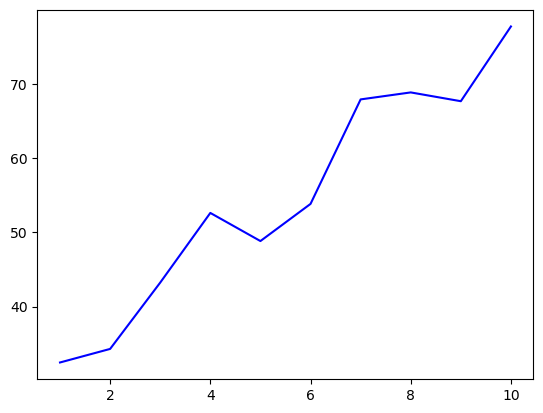

In [22]:
plt.plot(X,Y,color='blue',label='Actual Data')

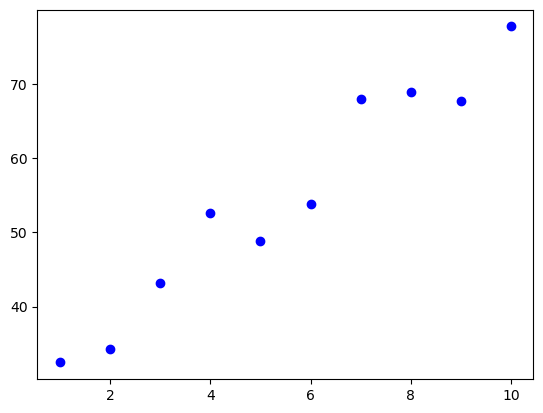

In [23]:
plt.scatter(X,Y,color='blue',label='Actual Data')

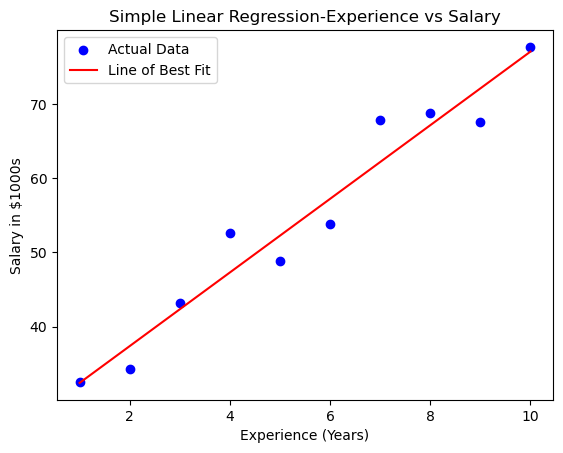

In [26]:
plt.scatter(X,Y,color='blue',label='Actual Data')
plt.plot(X,Y_pred,color='red',label='Line of Best Fit')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary in $1000s')
plt.title('Simple Linear Regression-Experience vs Salary')
plt.legend()
plt.show()

In [27]:
while True:
    try:
        exp=float(input("\nEnter years of experience to predict salary(or -1 to exit):"))
        if exp==-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except valueError:
        print("Please enter a valid number!")


Enter years of experience to predict salary(or -1 to exit):5
Predicted Salary for 5.0 years of experience: $52.26K

Enter years of experience to predict salary(or -1 to exit):10
Predicted Salary for 10.0 years of experience: $77.09K

Enter years of experience to predict salary(or -1 to exit):-1


01. Import libraries
02. Define dataset
03. Create a LR Model
04. Train the model
05. Co-efficient and Intercept
06. Display Line Equation
07. Predict values using model
    -mse -mae -rsme - r2
08. Plot Actual Data Points
09. Future Prediction